In [1]:
# a whatlies csomag segít vizualízálni a vektortérben a szavakat
#!pip install whatlies[spacy]
#!pip install umap-learn==0.5.2
#!pip install floret

A medium és large spaCy modellek tartalmaznak szóvektorokat. ^1 Jelenleg még csak néhány nyelven érhető el floret modell, egyelőre a többi nyelven még Word2Vec vektor elérhető.

Egyes esetekben előfordulhat, hogy egy-egy szóhoz nincs társított vektor az előre tanított modellben. Ezeket OOV (out-of-vocabulary), szótáron kívüli szavaknak nevezzük.

In [2]:
import spacy

In [3]:
# magyas és angol modell letöltése
#!python -m spacy download en_core_web_md
#!pip install https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.w#

Nézzük meg a különböző szavakat hogyan rendezi el a vektortérben ez a módszer. Az adatvizualizációhoz a whatlies csomagot fogjuk használni.

In [4]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage
from whatlies.transformers import Pca, Umap, Tsne

lang = SpacyLanguage("en_core_web_md")
words = ["cat", "dog", "fish", "kitten", "man", "woman",
         "king", "queen", "doctor", "nurse"]

emb = EmbeddingSet(*[lang[w] for w in words])
emb.plot_interactive(x_axis=emb["man"], y_axis=emb["woman"])

alt.LayerChart(...)

In [5]:
lang_en = SpacyLanguage("en_core_web_md")

In [6]:
words_en = ["oak", "bloodshed", "railcar", "representative", "pass", "soldier", "butterfly", 
            "noble", "seminar", "interference", "plastic", "offspring", "open", "chew", 
            "seek", "failure", "qualification", "access", "tolerant", "feeling", 
            "trust", "fox", "quiet", "hover", "book", "widen", 
            "thrust", "denial", "stay", "fitness"]

In [7]:
emb_en = lang_en[words_en]
pca_en = emb_en.transform(Pca(2)).plot_interactive(title="English: PCA")
tsne_en = emb_en.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=2)).plot_interactive(title="English: t-SNE")
umap_en = emb_en.transform(Umap(2)).plot_interactive(title="English: UMAP")

D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


3 dimenzióredukáló algoritmus outputját nézzük meg.

PCA: Principal Component Analysis
t-SNE: t-distributed Stochastic Neighbour Embedding
UMAP: Uniform Manifold Approximation and Projection
Bővebben: Dimensionality Reduction for Data Visualization: PCA vs TSNE vs UMAP vs LDA

In [8]:
pca_en | tsne_en | umap_en

alt.HConcatChart(...)

Magyar

In [9]:
lang_hu = SpacyLanguage("hu_core_news_lg")

D:\Users\t05cf\anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'hu_core_news_lg' (3.4.4) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [10]:
words_hu = ['disznó', 'ló', 'mókus', 'férfi', 'fiú',
         'gyerek', 'korcsolya', 'bicikli', 'hajó', 'kerékpár',
         'lány','nő', 'király', 'kutya', 'macska', 'hercegnő', 
         'királylány', 'királynő', 'doktor', 'nővér', 'színész', 'színésznő', 'felnőtt', "mentőautó", "villamos", "fő"]

In [11]:
emb_hu = lang_hu[words_hu]
pca_hu = emb_hu.transform(Pca(2)).plot_interactive(title="Hungarian: PCA")
tsne_hu = emb_hu.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=2)).plot_interactive(title="Hungarian: t-SNE")
umap_hu = emb_hu.transform(Umap(2)).plot_interactive(title="Hungarian: UMAP")

D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
pca_hu | tsne_hu | umap_hu

alt.HConcatChart(...)

In [13]:
nlp_hu = spacy.load("hu_core_news_lg")

D:\Users\t05cf\anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'hu_core_news_lg' (3.4.4) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [14]:
word = nlp_hu("kutya")
print('A kutya szó vektorai: ')
print(word.vector.shape)
word.vector

A kutya szó vektorai: 
(300,)


array([  3.603545  ,  -8.585735  ,  -3.9909801 ,  -4.2408786 ,
        -2.15684   ,  -4.3644648 ,  13.767516  ,   4.4704537 ,
        -0.993253  ,  -4.702815  ,  -0.8294897 ,  -5.789353  ,
         3.9019    ,   2.19381   ,   1.0284868 ,  -0.85395   ,
        -7.00367   ,   7.065059  ,   5.4955907 ,  -0.2897998 ,
        -0.12130991,  -4.8180656 ,   2.3591921 ,   4.29728   ,
         1.8926511 ,   2.2697356 ,   4.9105983 ,  -3.5317054 ,
         0.7089097 ,  -3.870646  ,   7.5655303 ,  11.46174   ,
         7.20969   ,   7.2623496 ,   0.7224157 ,   6.5261564 ,
        -1.6022139 ,  -6.0251503 ,  -6.389077  ,  -0.8644471 ,
         5.5763707 ,  12.282301  ,   5.4416814 ,  -0.6177506 ,
         2.09158   ,  -4.045505  ,  -4.4481096 ,  -0.42776307,
        -7.7218876 ,  -2.0602722 ,  -2.2159903 ,   5.5588255 ,
         5.0975256 ,   2.3449543 ,  -2.5514755 ,  -3.9290106 ,
        -4.0368123 ,  -3.01637   ,   5.135655  ,  -1.6724396 ,
        -5.082779  ,   1.2042856 ,   3.1309252 ,   2.12

In [15]:
nlp_en = spacy.load("en_core_web_md")
word = nlp_en('jghfhgfhfhfjhfhf')
print('ajghfhgfhfhfjhfhf szó vektorai: ')
print(word.vector.shape)
print('Szótáron kívüli szó?: ')
print(word[0].is_oov)
word.vector

ajghfhgfhfhfjhfhf szó vektorai: 
(300,)
Szótáron kívüli szó?: 
True


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
import numpy as np

In [17]:
def most_similar(word, top_n=5):
    ms = nlp_en.vocab.vectors.most_similar(
        np.asarray([nlp_en.vocab.vectors[nlp_en.vocab.strings[word]]]), n=top_n
    )
    words = [nlp_en.vocab.strings[w] for w in ms[0][0]]
    return words

In [18]:
print('A 10 leghasonlóbb vektorú szó: ')
most_similar("ajax", top_n=10)

A 10 leghasonlóbb vektorú szó: 


['relogin',
 'OWA',
 'iis7',
 'MISWIRING',
 'Mograph',
 'cmdlets',
 'msbuild',
 'as-new',
 'MULTIPAGE',
 'Multipage']

***Szóvektor modell tanítása***

*Gensim Word2Vec*

In [19]:
from gensim.models import word2vec
import csv
import random
import pandas as pd
pd.options.display.max_colwidth = 200

import multiprocessing
cores = multiprocessing.cpu_count()
print ('Calculations will be running on {} CPU cores'.format(cores))

# Functions
def recursive_len(item):
    '''Counts the total nr of elements in a list of lists'''
    if type(item) == list:
        return sum(recursive_len(subitem) for subitem in item)
    else:
        return 1

Calculations will be running on 8 CPU cores


*Korpusz beolvasás*

* A korpuszt lezárt Stack Overflow kérdésekből állították össze.
* Csak a kérdések címei szerepelnek
* A címek a következő előfeldolgozási lépéseken estek át:
    * tokenizálás
    * normalizálás: spec karakterek, számok és írásjelek törlése
* `LineSentence` formátum: 1 mondat (SO kérdés címe) soronként

In [20]:
## Read CSV from url
import csv, urllib.request

url = "https://raw.githubusercontent.com/rfarkas/student_data/main/SO_texts/SO_corpus_lines.csv"
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()] # response is in bytes that has to be decoded to string encoding
reader = csv.reader(lines)
SO_corpus = list(reader)

Alapvető információk a korpuszról

In [21]:
# Some basic info about corpus:
print('A korpusz sorainak száma:', len(SO_corpus))
print('A korpusz teljes méret, i.e., az összes szó száma:', recursive_len(SO_corpus))
print('Típus:', type(SO_corpus))
print('néhány példa sor:')
for j in range(5):
    i = random.randint(0, len(SO_corpus))
    print ('Sor:', i, ':', SO_corpus[i])

A korpusz sorainak száma: 202310
A korpusz teljes méret, i.e., az összes szó száma: 1110964
Típus: <class 'list'>
néhány példa sor:
Sor: 120317 : ['python', 'arrays', 'objects']
Sor: 144656 : ['rails', 'sum', 'values', 'array', 'hashes']
Sor: 159624 : ['errors', 'vs', 'think', 'recognising', 'classes']
Sor: 4323 : ['input', 'html', 'tag', 'parsing', 'properly', 'php']
Sor: 96401 : ['bus', 'error', 'using', 'gulp', 'watch', 'foundation', 'sass']


Gensim - Word2Vec modell építése CBOW módszerrel

A tanítás egy rejtett réteggel történik, figyelembe veszi a környezetet és a tanult háló rejtett rétegét használja fel szóvektorként. Két fő fajtája:

**CBOW:** A környezet alapján tippeljük meg mi a köztes szó. Bemenet egy adott méretű környezet (pl. 2-2 szó előtte és utána), tanulandó a közöttük levő szó.

**SKIP-GRAM:** Adott szó alapján tippeljük meg a környezet szavait. Bemenet egy szó, tanulandó a környezete pl. 2-2 szó előtte és utána.

Bemenet és kimenet kódolása:

* Bemenet one-hot encodinggal: teljes szótár méretének megfelelő vektor, ahol a bemeneti szónak megfelelő pozícióban 1 szerepel, minden más pozícióban 0.

* Kimenet valószínűségekkel: szótár méretű vektor, a legnagyobb érték mutatja a háló által tippelt szó pozícióját.

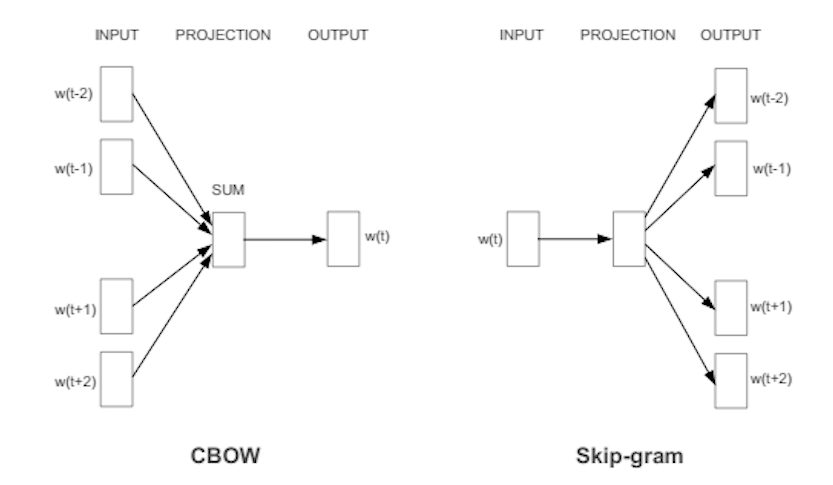


### Skip-gram leírás
https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c

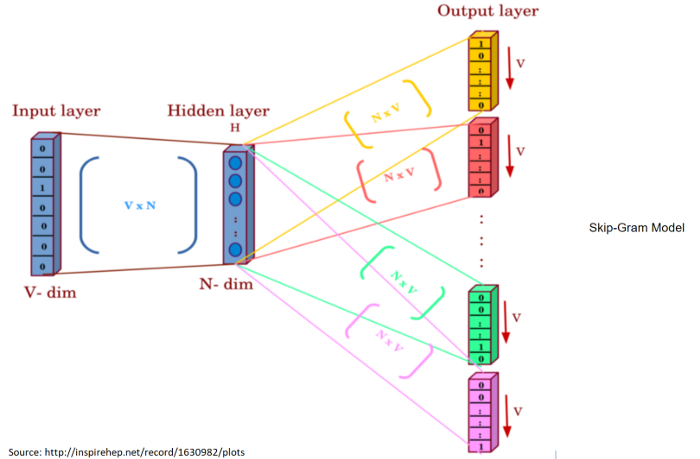

In [22]:
%%time
# Set values for various training parameters

# reference Google line:
#./word2vec -train corpus_1line.csv -output vectors_cbow.bin -cbow 1 -size 200 -window 8 -negative 25 -hs 0 -sample 1e-4 -threads 12 -binary 1 -iter 15 -alpha 0.025

feature_size = 200    # Word vector dimensionality  
window_context = 8    # Context window size                                                                                    
min_word_count = 5    # Minimum word count to filter frequently occured words
sample = 1e-4         # Downsample setting for frequent words
skipgram = 0          # 0 for CBOW, 1 for skip-gram
negative = 25         # value for negative sampling
hs = 0                # ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
niter = 15

w2v_model = word2vec.Word2Vec(SO_corpus, 
                              size=feature_size, 
                              sg=skipgram, 
                              negative=negative, 
                              hs=hs,
                              window=window_context, 
                              min_count=min_word_count,
                              sample=sample, 
                              iter=niter,
                              workers=cores)

CPU times: total: 53.6 s
Wall time: 15.3 s


A modell tulajdonságai:

In [23]:
print(w2v_model)

Word2Vec(vocab=8057, size=200, alpha=0.025)


Példák hasonlóságokra: néhány szó és a hozzá 10 leghasonlóbb a korpuszból.

In [24]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=10)]
                  for search_term in ['array', 'loop', 'javascript', 'python', 'digit', 'website', 'recursion','data', 'table', 'ajax']}


res_gensim = pd.DataFrame(similar_words)
res_gensim

,array,loop,javascript,python,digit,website,recursion,data,table,ajax
0,arrays,iteration,jquery,dict,digits,site,recursive,databse,tables,success
1,multidimensional,foreach,onchange,haskell,upto,websites,factorial,retrieved,row,getjson
2,associative,loops,vanilla,comprehension,numbers,viewing,iterative,values,rows,post
3,indexes,iterations,js,perl,number,pages,depth,information,column,callback
4,ints,looping,innerhtml,slicing,multiples,friendly,fibonacci,datas,pivot,request
5,dimensional,met,addclass,tuples,four,sites,traversal,retrive,records,axios
6,dimension,continue,attr,bunch,divisible,landing,quicksort,filed,columns,synchronous
7,nsmutablearray,infinite,textarea,dicts,consecutive,redirects,backtracking,rows,databse,submitting
8,pairs,increments,dom,bash,zeros,cookies,haskell,blob,alter,refreshing
9,hashtable,infinitely,getelementsbyclassname,recursively,five,seo,summation,retrieving,colum,onchange


In [25]:
print('LOOP szó Word2Vec vektorai: ')
w2v_model.wv.get_vector('loop')

LOOP szó Word2Vec vektorai: 


array([-0.2543293 ,  0.08424114, -0.03054255, -0.37772417, -0.27983963,
        0.4010347 ,  0.01055786, -0.28484252,  0.3527022 , -0.11066782,
       -0.43755904,  0.28618872, -0.03018028,  0.21302694,  0.15503429,
        0.1779158 ,  0.5844276 ,  0.4134383 ,  0.03749823, -0.49401194,
        0.34102434,  0.05232214, -0.1563386 , -0.14244643,  0.06507845,
       -0.49961355, -0.02889578, -0.597449  ,  0.33967927,  0.07398856,
       -0.27444202,  0.05210797, -0.07107647, -0.03388584, -0.51306427,
       -0.29855642,  0.47103128, -0.79848915, -0.6038515 , -0.18004826,
        0.16113763, -0.25427002,  0.08617046, -0.8725433 , -0.36105096,
        0.59728163, -0.06345732,  0.07499752, -0.3282004 , -0.4439093 ,
       -0.4682479 ,  0.09418766, -0.10048986,  0.5871073 , -0.68193555,
        0.3933159 ,  0.1079231 , -0.45184687, -0.09933101,  0.2925764 ,
        0.06987556, -0.07478516,  0.0933056 ,  0.114369  ,  0.15710783,
       -0.60709137, -0.17856039, -0.1462013 , -0.27135807, -0.58

Vizualizáljuk a DataFrameben megjelent szavakat!

In [26]:
from whatlies.language import GensimLanguage

In [27]:
w2v_model.wv.save("word2vec.kv")

In [28]:
lang_w2v = GensimLanguage("word2vec.kv")

In [29]:
words_w2v = set()
for column in res_gensim:
    for word in res_gensim[column]:
        words_w2v.add(word)

In [30]:
emb_w2v = lang_w2v[list(words_w2v)[:40]]
pca_w2v = emb_w2v.transform(Pca(2)).plot_interactive(title="Word2Vec: PCA")
tsne_w2v = emb_w2v.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=3)).plot_interactive(title="Word2Vec: t-SNE")
umap_w2v = emb_w2v.transform(Umap(2)).plot_interactive(title="Word2Vec: UMAP")

D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [31]:
pca_w2v | tsne_w2v | umap_w2v

alt.HConcatChart(...)

## Floret

https://github.com/explosion/floret/tree/main/python, https://fasttext.cc/docs/en/unsupervised-tutorial.html

### Floret modell építése CBOW módszerrel

In [32]:
import floret

In [33]:
#!python -m wget https://raw.githubusercontent.com/rfarkas/student_data/main/SO_texts/SO_corpus_lines.csv

In [34]:
#a csv file megformázása
#!python -m sed -i -e 's/,/ /g' SO_corpus_lines.csv

In [35]:
%%time
floret_model = floret.train_unsupervised("SO_corpus_lines_sed.csv",
                                         model="cbow",
                                         mode="floret",
                                         dim=200,
                                         hashCount=2,
                                         bucket=50000,
                                         neg=25,
                                         minn=4,
                                         maxn=5,
                                         thread=cores)

CPU times: total: 3min 37s
Wall time: 33 s


In [36]:
floret_model.save_model("floret.bin")
floret_model.save_vectors("floret.vec")
floret_model.save_floret_vectors("floret.floret")

In [37]:
similar_words = {search_term: [item[1] for item in floret_model.get_nearest_neighbors(search_term, k=10)]
                  for search_term in ['array', 'loop', 'javascript', 'python', 'digit', 'website', 'recursion', 'data', 'table', 'ajax']}

res_floret = pd.DataFrame(similar_words)
res_floret

,array,loop,javascript,python,digit,website,recursion,data,table,ajax
0,subarray,looped,javascripts,ipython,digits,site,recursive,datas,tableau,ch
1,arrays,loops,javasscript,pythons,digital,websites,recursively,databse,tablets,post
2,nsarray,loopback,ecmascript,jython,isdigit,sites,fibonacci,cdata,jtable,dopost
3,arraypush,met,noscript,pythonic,numbers,webpages,haskell,datarow,tablet,echoed
4,toarray,foreach,jscript,ironpython,number,scrapy,logarithm,dataset,datatable,succes
5,arrray,infinite,wscript,dict,numbered,scraper,depth,datastore,tables,httppost
6,subarrays,forloop,superscript,pythagorean,hyphen,webrtc,eratosthenes,dat,stable,onsubmit
7,arrary,looping,vbscript,tuples,nsdecimalnumber,websphere,opinion,jsondata,vtable,postman
8,inarray,poor,coffeescript,tuple,rownumber,webpage,maze,odata,datatables,pageload
9,nsmutablearray,iteratively,descriptor,dictonary,nsnumber,scraped,scenes,datatables,selectable,success


In [38]:
print('LOOP szó floret vektorai: ')
floret_model.get_word_vector("loop")

LOOP szó floret vektorai: 


array([-2.67440677e-01,  2.56683409e-01, -2.66897883e-02, -3.91141474e-02,
        4.92635816e-01, -1.47402585e-01,  8.03401321e-03,  7.11576879e-01,
        2.59704441e-01,  1.00049484e+00,  2.09200054e-01,  5.58961809e-01,
       -2.48759672e-01,  1.52346864e-01, -3.30307126e-01,  3.10826480e-01,
       -9.58927274e-01,  6.42073274e-01,  3.49575698e-01, -5.37304044e-01,
       -7.85221577e-01, -3.07503879e-01,  4.70399559e-01,  1.17703542e-01,
        8.52943599e-01,  3.05865079e-01, -7.94028193e-02, -1.85035598e-02,
        2.71819711e-01,  5.69405913e-01, -4.28825736e-01, -2.29404476e-02,
        4.07982916e-02,  4.65449631e-01,  2.10066959e-01, -4.26484346e-01,
        1.22925125e-01, -7.03509510e-01, -7.16222376e-02,  4.54784572e-01,
        4.23441470e-01, -1.78972423e-01,  2.38384008e-01, -1.98167413e-01,
       -1.19305484e-01,  6.82287335e-01, -5.08518815e-01, -6.58774972e-01,
       -6.78248048e-01,  5.13751268e-01, -2.20332026e-01,  4.61764187e-01,
       -7.73251235e-01,  

In [39]:
from whatlies.language import FloretLanguage

In [40]:
lang_floret = FloretLanguage("floret.bin")

In [41]:
words_floret = set()
for column in res_floret:
    for word in res_floret[column]:
        words_floret.add(word)

In [42]:
emb_floret = lang_floret[list(words_floret)[:40]]
pca_floret = emb_floret.transform(Pca(2)).plot_interactive(title="Floret: PCA")
tsne_floret = emb_floret.transform(Tsne(n_components=2, random_state=0, n_iter=10000, perplexity=3)).plot_interactive(title="Floret: t-SNE")
umap_floret = emb_floret.transform(Umap(2)).plot_interactive(title="Floret: UMAP")

D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Users\t05cf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
pca_floret | tsne_floret | umap_floret

alt.HConcatChart(...)

# Szöveg-, dokumentumszintű beágyazási módszerek
A szavak szintje önmagában nagyon kevés információ tartalmaz. Esetenként szükségünk lehet további adatokra, ilyenkor szeretnénk nagyobb egységekre - például mondatokra vagy bekezdésekre - is egy-egy vektort előállítani.

Különböző ötletek jöhetnek ez esetben szóba:
 * A szövegben található szóvektorok közül válasszunk ki egy reprezentáns elemet
 * Átlagoljuk ki a szóvektorokat és ez az átlag legyen a szövegszintű vektorunk
 * Tanítsunk szövegszintű beágyazást 

### Dokumentumszintű vektorok a spaCy esetén

Egyszerű megoldás: a szóvektorok átlaga.

Érezhető a módszer hátránya: a nyelvi finomságokat könnyen elveszíthetjük, például a szórenddel kifejezett kiemeléseket az átlag nem különbözteti meg mondat szinten.

Ennek ellenére egy gyakorlatban jól alkalmazható megoldás.

In [44]:
# Defináljuk a Dokumentumunkat
doc = nlp_hu("biciklivel megyek boltba")

# Megkeressük a szavak vektorait
wv = []
for tk in doc:
    wv.append(tk.vector)

dv_1 = doc.vector # spaCy dokumentum vektor
dv_2 = np.mean([wv[0], wv[1], wv[2]], axis=0) # numpy-val kiszámítjuk a szóvektorok átlagát

# Megnézzük, hogy a különbség 0-e, ha igen, akkor bizonyítottuk, hogy a spaCy is így számol dokumentum vektort
all(v == 0 for v in dv_1 - dv_2)

True

In [45]:
doc1 = nlp_hu("villamossal megyek a térre")
doc2 = nlp_hu("a térre villamsosal megyek")
print('Dokumentumok hasonlósága:', doc1.similarity(doc2))

Dokumentumok hasonlósága: 0.9913338005910385


## Tanulás alapú megoldások

### Bert és egyéb Transformer-hálók
- Léteznek már magyar nyelvre is dokumentszintű reprezentáló előtanított modellek, ilyen a [huBERT](https://huggingface.co/SZTAKI-HLT/hubert-base-cc) is, amit például a HuSpaCy [`hu_core_news_trf`](https://huggingface.co/huspacy/hu_core_news_trf) modellje használ is. Ezzel rendkívűl pontos előfeldolgozó rendszereket lehet finomhangolni, hátránya persze a nagyon sok millió paraméternek köszönhetően, hogy lassú, ami sok esetben hátrány, de alkalmazás válogatja. Aki szeretne mélyebben megismerkedni ezen neuronhálókkal és még sok egyébbel, azoknak ajánljuk Berend Gábor óráját a [Számítógépes szemantikát](https://github.com/begab/compsem/).

### Doc2Vec
- És ahogyan szó volt, léteznek jóval egyszerűbb megoldások is, mint a Doc2Vec. 


# Dokumentumosztályozás szóbeágyazásra építve

In [46]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.callbacks import CallbackAny2Vec
import tensorflow as tf
import multiprocessing
import numpy as np
import os

## Töltsük le az IMDB reviews adathalmazt

A train_reviews és test_reviews ndarray objektumok, melyek integer-eket tartalmazó listákból állnak. 25000 ilyen listát találhatunk mindkét objektumban. Egy-egy integer-eket tartalmazó lista egy-egy review. Az integer-ek egyedi azonosítók, melyek a szavakat kódolják. A train_labels és test_labels szintén ndarray objektumok, melyek a review-k címkéit tartalmazzák. Minden egyes review-t pozitív (1) vagy negatív (0) kategóriába sorolunk.

In [47]:
imdb = tf.keras.datasets.imdb
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data()

In [48]:
train_reviews[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [49]:
train_labels[0]

1

Készítsük el az szavakat reprezentáló integer-ek dekódolásához a szótárunkat. Ehhez használni tudjuk az imdb objektum get_word_index() metódusát, ami egy dictionary-t ad vissza, melyben a szavak string alakja a kulcs, az integer alakja pedig az érték. A dictionary elejéhez hozzáadunk néhány tag-et.

In [50]:
vocab = imdb.get_word_index()
vocab = {k:(v + 3) for k, v in vocab.items()}
vocab["<PAD>"] = 0
vocab["<START>"] = 1
vocab["<UNK>"] = 2
vocab["<UNUSED>"] = 3

In [51]:
vocab["brilliant"]

530

Készítsünk inverz szótárat, amelyben a szavak integer alakja a kulcs, a string alakja pedig az érték.

In [52]:
vocab_inv = dict([(value, key) for (key, value) in vocab.items()])

In [53]:
vocab_inv[530]

'brilliant'

Definiáljunk egy decode_review() metódust, mely a review-k integer reprezentációját string reprezentációvá alakítja.

In [54]:
def decode_review(review):
    return [vocab_inv.get(i, "?") for i in review]

In [55]:
decode_review(train_reviews[0])

['<START>',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'a

## Doc2Vec dokumentumbeágyazások létrehozása

A dokumentumvektorok elkészítéséhez a gensim csomagot fogjuk használni. Alakítsuk a review-kat TaggedDocument objektumokká.

In [56]:
reviews = np.concatenate((train_reviews, test_reviews))
docs = [TaggedDocument(decode_review(review), [i]) for i, review in enumerate(reviews)]

In [57]:
class Doc2VecCallback(CallbackAny2Vec):
    def __init__(self, epochs):
        self.prog_bar = tf.keras.utils.Progbar(epochs)
        self.epoch = 0
    def on_epoch_end(self, model):
        self.epoch += 1
        self.prog_bar.update(self.epoch)

A Doc2Vec osztály elkészíti a review-k dokumentum vektorait.

In [58]:
d2v_model = Doc2Vec(docs, dm=0, min_count=2, vector_size=100, hs=0, negative=5, epochs=5,
                    callbacks=[Doc2VecCallback(5)], sample=0, workers=multiprocessing.cpu_count())

5/5 [==============================] - 53s 7s/step


In [59]:
# fname = '/content/d2v_model'
# d2v_model = Doc2Vec.load(fname)  # you can continue training with the loaded model!

Nyerjük ki a modellből a train_reviews és test_reviews adataink vektoros reprezentációit.

In [60]:
embdgs = d2v_model.docvecs.vectors_docs
train_embdgs, test_embdgs = np.split(embdgs, [25000])

In [61]:
train_embdgs[0]

array([-1.74097687e-01, -5.14344990e-01,  3.22573334e-01,  1.19337395e-01,
        1.19754776e-01, -8.17687809e-02, -3.75188068e-02,  2.42810890e-01,
       -1.67408139e-01,  3.37305278e-01, -8.80542994e-02,  4.14379567e-01,
       -1.62556902e-01, -3.78617376e-01, -5.74041128e-01, -1.92857325e-01,
       -1.08339950e-01,  1.77179515e-01, -4.67040688e-01, -2.31176093e-01,
        1.88196644e-01, -2.68895477e-01,  2.09444746e-01,  2.56040871e-01,
       -4.81825769e-02, -2.84133285e-01, -3.69418226e-02, -3.18361342e-01,
        1.81730717e-01,  2.51744598e-01, -2.40283996e-01, -2.25647315e-01,
        1.94938660e-01, -8.38461705e-03, -1.48170277e-01,  1.14606321e-01,
        3.74331488e-04, -9.62333530e-02,  2.96103070e-04,  3.60146403e-01,
       -2.06620209e-02, -5.04186928e-01, -2.95274884e-01,  5.39792068e-02,
       -2.65883300e-02, -2.88528740e-01, -2.84338951e-01,  1.13575868e-02,
       -3.49431336e-02, -1.62832394e-01,  2.71625370e-01,  7.48740835e-03,
       -1.78291321e-01, -

## Osztályozás Doc2Vec beágyazások alapján

In [62]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_1.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.01), loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
model_1.fit(train_embdgs, train_labels, batch_size=64, epochs=50, shuffle=True)

Epoch 1/50
391/391 [==============================] - 5s 7ms/step - loss: 0.4042 - accuracy: 0.8334
Epoch 2/50
391/391 [==============================] - 3s 6ms/step - loss: 0.3440 - accuracy: 0.8512
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3391 - accuracy: 0.8526
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3374 - accuracy: 0.8527
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3358 - accuracy: 0.8536
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3354 - accuracy: 0.8550
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3353 - accuracy: 0.8546
Epoch 8/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3340 - accuracy: 0.8552
Epoch 9/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3340 - accuracy: 0.8547
Epoch 10/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3335 - accuracy: 0.8545

In [64]:
model_1.evaluate(test_embdgs, test_labels)

782/782 [==============================] - 4s 4ms/step - loss: 0.3399 - accuracy: 0.8523


[0.3398783206939697, 0.8523200154304504]

Hozzunk létre egy fokkal összetettebb neuronhálót.

In [65]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(50, activation="relu", input_shape=(100, )))
model_2.add(tf.keras.layers.Dropout(0.3))
model_2.add(tf.keras.layers.Dense(50, activation="relu"))
model_2.add(tf.keras.layers.Dropout(0.2))
model_2.add(tf.keras.layers.Dense(50, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_2.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.01), loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
model_2.fit(train_embdgs, train_labels, batch_size=64, epochs=50, shuffle=True)

Epoch 1/50
391/391 [==============================] - 4s 9ms/step - loss: 0.3788 - accuracy: 0.8349
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3536 - accuracy: 0.8476
Epoch 3/50
391/391 [==============================] - 4s 9ms/step - loss: 0.3466 - accuracy: 0.8507
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3452 - accuracy: 0.8523
Epoch 5/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3450 - accuracy: 0.8512
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3398 - accuracy: 0.8535
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 0.3381 - accuracy: 0.8541
Epoch 8/50
391/391 [==============================] - 4s 9ms/step - loss: 0.3395 - accuracy: 0.8553
Epoch 9/50
391/391 [==============================] - 4s 10ms/step - loss: 0.3347 - accuracy: 0.8563
Epoch 10/50
391/391 [==============================] - 4s 9ms/step - loss: 0.3344 - accuracy: 0.856

In [67]:
model_2.evaluate(test_embdgs, test_labels)

782/782 [==============================] - 5s 6ms/step - loss: 0.3346 - accuracy: 0.8552


[0.3346216678619385, 0.8551999926567078]

## Példa Keras kód CBOW beágyazás tanításához

In [68]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Lambda, dot, Input, Reshape
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 16, 200)           2000000   
                                                                 
 lambda_2 (Lambda)           (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 10000)             2010000   
                                                                 
Total params: 4,010,000
Trainable params: 4,010,000
Non-trainable params: 0
_________________________________________________________________
None


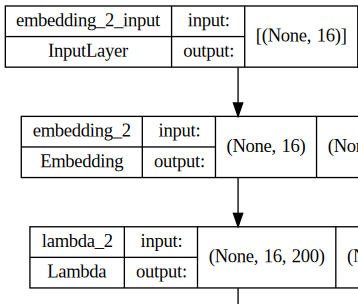

In [71]:
# example CBOW architecture in Keras

vocab=np.zeros(10000)

vocab_size=len(vocab)
embed_size=200
window_size=8

cbow = Sequential()

cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=True, 
                 rankdir='TB').create(prog='dot', format='svg'))